In [1]:
!pip install mlem torchvision tensorflow numpy --upgrade
!pip install mlem==0.4.6 --no-deps
!pip install iterative-telemetry==0.0.7 --ignore-requires-python --no-deps
!pip install pydantic==1.10.2 --no-deps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.5/218.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 53.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.1/218.1 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.3/216.3 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.5/214.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.8/213.8 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.3/213.3 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.1/212.1 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.8/205.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

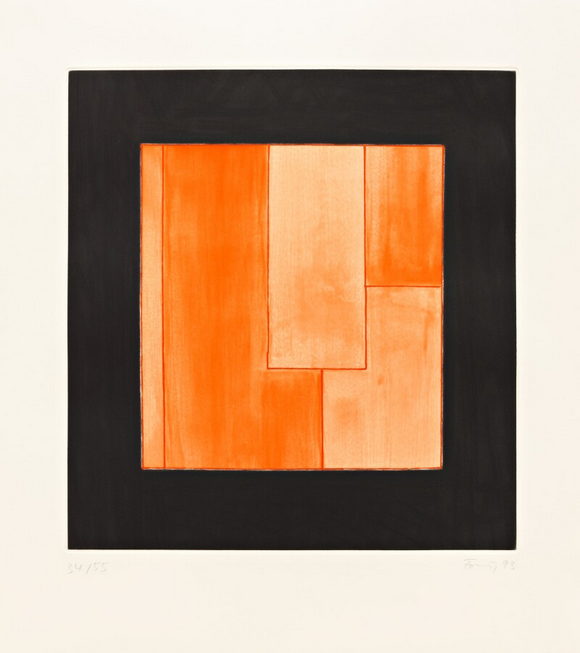

In [2]:
from PIL import Image

Image.open("/kaggle/input/art-price-dataset/artDataset/image_10.png")

In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/art-price-dataset/artDataset.csv")
df["image"] = [f'image_{i}.png' for i in range(1, len(df) + 1)]
df.head()

Unnamed: 0       price                    artist                  title  \
0           0  28.500 USD           Tommaso Ottieri         Bayreuth Opera   
1           1   3.000 USD         Pavel Tchelitchew  Drawings of the Opera   
2           2   5.000 USD                 Leo Gabin        Two on Sidewalk   
3           3   5.000 USD         Matthias Dornfeld            Blumenszene   
4           4   2.500 USD  Alexis Marguerite Teplin   Feverish Embarkation   

               yearCreation  \
0                      2021   
1  First Half 20th Century    
2                      2016   
3                      2010   
4                      2001   

                                              signed  \
0                                    Signed on verso   
1                                  Signed and titled   
2                  Signed, titled and dated on verso   
3  Signed, titled and dated on the reverse with t...   
4                                    Signed on verso   

                                           condition        period  \
0               This work is in excellent condition.  Contemporary   
1  Not examined out of frame.No obvious signs of ...      Post-War   
2               This work is in excellent condition.  Contemporary   
3  This work is in excellent condition.There is m...  Contemporary   
4               This work is in excellent condition.  Contemporary   

     movement        image  
0     Baroque  image_1.png  
1  Surrealism  image_2.png  
2    Abstract  image_3.png  
3    Abstract  image_4.png  
4    Abstract  image_5.png

In [4]:
import os

images = list(os.walk("/kaggle/input/art-price-dataset/artDataset"))[0][2]
prices = df.set_index("image").loc[images].price.map(lambda x: int(x.strip(" USD").replace(".", ""))).values

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

images_arrays = []
for i in images:
    img = load_img(f"/kaggle/input/art-price-dataset/artDataset/{i}",target_size=(256,256))
    images_arrays.append(img_to_array(img))
    
    
images_arrays = np.concatenate([i.reshape(1, 256,256, 3) for i in images_arrays])
images_arrays.shape

(754, 256, 256, 3)

In [8]:
train_images = images_arrays[:660]
test_images = images_arrays[660:]

print(train_images.shape,test_images.shape)

(660, 256, 256, 3) (94, 256, 256, 3)


In [128]:
(prices-np.mean(prices))**0.25

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


array([10.72668897,         nan, 12.14258195,         nan,  9.52734006,
               nan,  5.21428793, 12.60430863,         nan,         nan,
               nan,         nan, 10.72668897,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,  5.34179082,  9.52734006,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  3.93282172,
               nan,         nan,  9.52734006,         nan,         nan,
               nan,         nan,         nan,         nan,  7.54415273,
        9.80412757,         nan,  8.06903807,  3.93282172,         nan,
               nan,         nan, 13.70113687,         nan,         nan,
        7.54415273,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,  9.52734006,
               nan,         nan,         nan,         nan,      

In [142]:
np.log10(prices-np.min(prices)+1)

array([4.28793603, 2.78247262, 4.44569759, 2.81690384, 4.15854341,
       2.78247262, 3.83922657, 4.49701263, 3.48939592, 3.64404449,
       3.59173224, 3.38129562, 4.28793603, 2.31386722, 2.31386722,
       2.83314711, 2.31386722, 2.31386722, 2.9571282 , 2.9571282 ,
       2.31386722, 3.84391764, 4.15854341, 1.93449845, 3.53224464,
       2.31386722, 2.31386722, 2.9571282 , 2.31386722, 3.38129562,
       2.9571282 , 3.14798532, 0.77815125, 3.73287604, 3.80658693,
       2.31386722, 3.2801229 , 4.15854341, 2.31386722, 3.53160663,
       3.73287604, 3.14798532, 3.38129562, 2.31386722, 3.97340497,
       4.18768989, 2.31386722, 4.01728382, 3.80658693, 3.38129562,
       3.38129562, 2.9571282 , 4.61706328, 3.14798532, 1.93449845,
       3.97340497, 2.9571282 , 2.31386722, 2.9571282 , 2.31386722,
       2.31386722, 3.73287604, 3.64404449, 3.14798532, 4.15854341,
       2.31386722, 2.84571802, 3.53224464, 2.48572143, 1.93449845,
       4.38749661, 2.9571282 , 2.31386722, 3.38129562, 3.73287

In [144]:
np.min(prices)

595

In [149]:
np.log10(prices-585)

array([4.28813739, 2.78887512, 4.44583763, 2.82282165, 4.15881465,
       2.78887512, 3.83979218, 4.49713706, 3.49066065, 3.64493071,
       3.59273177, 3.38291714, 4.28813739, 2.33243846, 2.33243846,
       2.83884909, 2.33243846, 2.33243846, 2.96142109, 2.96142109,
       2.33243846, 3.84447718, 4.15881465, 1.97772361, 3.53339071,
       2.33243846, 2.33243846, 2.96142109, 2.33243846, 3.38291714,
       2.96142109, 3.15075644, 1.17609126, 3.73359846, 3.80719666,
       2.33243846, 3.28216878, 4.15881465, 2.33243846, 3.53275438,
       3.73359846, 3.15075644, 3.38291714, 2.33243846, 3.97382032,
       4.18794353, 2.33243846, 4.01765927, 3.80719666, 3.38291714,
       3.38291714, 2.96142109, 4.61715767, 3.15075644, 1.97772361,
       3.97382032, 2.96142109, 2.33243846, 2.96142109, 2.33243846,
       2.33243846, 3.73359846, 3.64493071, 3.15075644, 4.15881465,
       2.33243846, 2.85125835, 3.53339071, 2.49831055, 1.97772361,
       4.38765673, 2.96142109, 2.33243846, 3.38291714, 3.73359

(array([  4.,   1.,  49., 136., 148., 114., 150., 106.,  39.,   7.]),
 array([1.        , 1.42025292, 1.84050584, 2.26075876, 2.68101167,
        3.10126459, 3.52151751, 3.94177043, 4.36202335, 4.78227627,
        5.20252918]),
 <BarContainer object of 10 artists>)

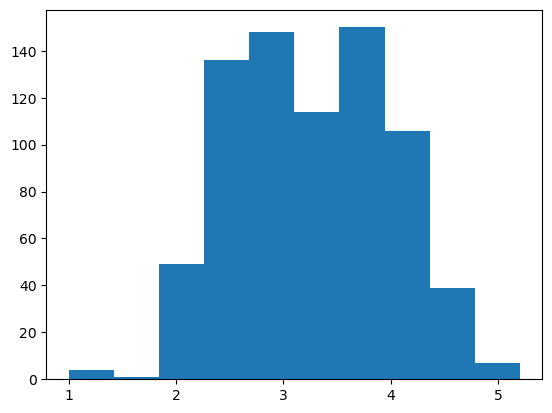

In [145]:
plt.hist(np.log10(prices-585))

In [163]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV3Small, EfficientNetV2L, NASNetMobile
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as efficientnet_preprocess_input
from tensorflow.keras.applications.nasnet import preprocess_input as nasnet_preprocess_input

def rmsle(y_true, y_pred): 
    a = tp(y_true, y_pred) 
    b = fp(y_true, y_pred)
    return a - b

# Load the ResNet50 model
#base_model = MobileNetV3Small(include_top=False, input_shape=(256, 256, 3))
#base_model = EfficientNetV2L(include_top=False, input_shape=(256, 256, 3))
base_model = NASNetMobile(include_top=False, input_shape=(256, 256, 3))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_squared_logarithmic_error', patience=120,
                                           restore_best_weights=True)
#sv_model = tf.keras.callbacks.ModelCheckpoint(model_fn, save_best_only=True, monitor='val_mean_squared_logarithmic_error')
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(factor=0.9)

# Create a new model on top
inputs = keras.Input(shape=(256, 256, 3))
x = nasnet_preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.AveragePooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid')(x)
x = keras.layers.Dense(256,activation='tanh', kernel_regularizer='l2')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(256,activation='sigmoid')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, kernel_regularizer='l1')(x)

model = keras.Model(inputs, outputs)

# Freeze the base_model
base_model.trainable = False

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.13)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error',
                                                                      'mean_squared_logarithmic_error'])
# val loss don't go less than 6700
# but, the constant loss is 12800
# np.mean((prices - np.mean(prices)) ** 2) ** 0.5

# Train the model on your regression dataset
history = model.fit(train_images, np.log10(prices[:660]-585), epochs=1200, callbacks=[callback, lr_callback],
                   validation_data=(test_images,np.log10(prices[660:] - 585)))

best_score = min(history.history['val_mean_squared_logarithmic_error'])
best_epoch = history.history['val_mean_squared_logarithmic_error'].index(best_score)
print(f"best epoch {best_epoch+1}  val_RMSLE: {best_score}")
print("metrics:")
print(f"Train MAE: {history.history['mean_absolute_error'][best_epoch]:.2f}    Train RMSLE: {history.history['mean_squared_logarithmic_error'][best_epoch]:.5f}")
print(f"val MAE: {history.history['val_mean_absolute_error'][best_epoch]:.2f}    val RMSLE: {history.history['val_mean_squared_logarithmic_error'][best_epoch]:.5f}")

Epoch 1/1200


2023-04-14 16:47:42.824104: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_21/dropout_50/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


21/21 [==============================] - 123s 374ms/step - loss: 23.6691 - mean_absolute_error: 3.2845 - mean_squared_logarithmic_error: 0.7195 - val_loss: 29.6400 - val_mean_absolute_error: 0.7262 - val_mean_squared_logarithmic_error: 0.0497 - lr: 0.1300
Epoch 2/1200
21/21 [==============================] - 2s 86ms/step - loss: 20.8777 - mean_absolute_error: 0.7784 - mean_squared_logarithmic_error: 0.0906 - val_loss: 15.8243 - val_mean_absolute_error: 0.7762 - val_mean_squared_logarithmic_error: 0.0622 - lr: 0.1300
Epoch 3/1200
21/21 [==============================] - 2s 90ms/step - loss: 13.5146 - mean_absolute_error: 0.7936 - mean_squared_logarithmic_error: 0.0691 - val_loss: 9.5109 - val_mean_absolute_error: 0.8716 - val_mean_squared_logarithmic_error: 0.0617 - lr: 0.1300
Epoch 4/1200
21/21 [==============================] - 2s 102ms/step - loss: 6.3586 - mean_absolute_error: 0.8740 - mean_squared_logarithmic_error: 0.0785 - val_loss: 6.3008 - val_mean_absolute_error: 0.7367 - val_

In [180]:
help(model.fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return a tuple
            of either `(inp

In [183]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV3Small, EfficientNetV2L, NASNetMobile
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input as efficientnet_preprocess_input
from tensorflow.keras.applications.nasnet import preprocess_input as nasnet_preprocess_input


# Load the ResNet50 model
#base_model = MobileNetV3Small(include_top=False, input_shape=(256, 256, 3))
#base_model = EfficientNetV2L(include_top=False, input_shape=(256, 256, 3))
base_model = NASNetMobile(include_top=False, input_shape=(256, 256, 3))

callback = tf.keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=25,
                                           restore_best_weights=True)
#sv_model = tf.keras.callbacks.ModelCheckpoint(model_fn, save_best_only=True, monitor='val_mean_squared_logarithmic_error')
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(factor=0.9)

# Create a new model on top
inputs = keras.Input(shape=(256, 256, 3))
x = nasnet_preprocess_input(inputs)
x = base_model(x, training=False)
x = keras.layers.AveragePooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid')(x)
x = keras.layers.Dense(256,activation='tanh', kernel_regularizer='l2')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(256,activation='sigmoid')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1, kernel_regularizer='l1')(x)

model = keras.Model(inputs, outputs)

# Freeze the base_model
base_model.trainable = False

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.13)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error',
                                                                      'mean_squared_logarithmic_error'])
# val loss don't go less than 6700
# but, the constant loss is 12800
# np.mean((prices - np.mean(prices)) ** 2) ** 0.5

# Train the model on your regression dataset
history = model.fit(images_arrays, np.log10(prices-585), epochs=120, callbacks=[callback, lr_callback],
                   validation_split=0.1)

best_score = min(history.history['val_mean_squared_logarithmic_error'])
best_epoch = history.history['val_mean_squared_logarithmic_error'].index(best_score)
print(f"best epoch {best_epoch+1}  val_RMSLE: {best_score}")
print("metrics:")
print(f"Train MAE: {history.history['mean_absolute_error'][best_epoch]:.2f}    Train RMSLE: {history.history['mean_squared_logarithmic_error'][best_epoch]:.5f}")
print(f"val MAE: {history.history['val_mean_absolute_error'][best_epoch]:.2f}    val RMSLE: {history.history['val_mean_squared_logarithmic_error'][best_epoch]:.5f}")

Epoch 1/120


2023-04-14 17:04:30.339509: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_23/dropout_54/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


22/22 [==============================] - 21s 333ms/step - loss: 21.2526 - mean_absolute_error: 3.0955 - mean_squared_logarithmic_error: 0.5928 - val_loss: 12.5948 - val_mean_absolute_error: 1.6828 - val_mean_squared_logarithmic_error: 0.2650 - lr: 0.1300
Epoch 2/120
22/22 [==============================] - 2s 103ms/step - loss: 10.0827 - mean_absolute_error: 0.8618 - mean_squared_logarithmic_error: 0.1130 - val_loss: 6.4480 - val_mean_absolute_error: 0.6084 - val_mean_squared_logarithmic_error: 0.0345 - lr: 0.1300
Epoch 3/120
22/22 [==============================] - 2s 80ms/step - loss: 7.3721 - mean_absolute_error: 0.7348 - mean_squared_logarithmic_error: 0.0472 - val_loss: 5.5034 - val_mean_absolute_error: 0.7386 - val_mean_squared_logarithmic_error: 0.0432 - lr: 0.1300
Epoch 4/120
22/22 [==============================] - 2s 103ms/step - loss: 6.4528 - mean_absolute_error: 0.7547 - mean_squared_logarithmic_error: 0.0851 - val_loss: 6.1877 - val_mean_absolute_error: 0.5575 - val_mean_

In [95]:
best_score = min(history.history['val_mean_squared_logarithmic_error'])

history.history['val_mean_squared_logarithmic_error'].index(best_score)

118

21/21 [==============================] - 6s 68ms/step


(array([165., 134.,  87.,  69.,  68.,  70.,  34.,  23.,   8.,   2.]),
 array([2.77451697, 3.01009865, 3.24568033, 3.48126201, 3.71684369,
        3.95242537, 4.18800705, 4.42358873, 4.65917041, 4.89475209,
        5.13033377]),
 <BarContainer object of 10 artists>)

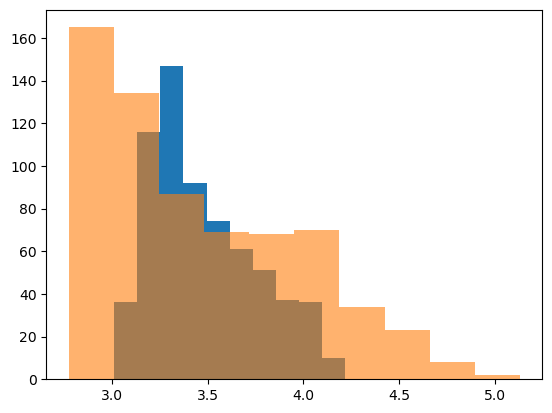

In [184]:
train_preds = model.predict(train_images)

plt.hist(np.log10(10**train_preds+585))
plt.hist(np.log10(prices[:660]),alpha=0.6)

In [185]:
rmsle(prices,10**model.predict(images_arrays)+585)

24/24 [==============================] - 2s 74ms/step


0.5866873388812547

In [166]:
preds = model.predict(test_images,steps=1)
preds.shape

1/1 [==============================] - 0s 237ms/step


(94, 1)

In [152]:
preds[0:10]

array([[3.2056415],
       [3.1971955],
       [3.1677585],
       [3.1972952],
       [3.2004251],
       [3.2736645],
       [3.357375 ],
       [3.6745093],
       [3.3826072],
       [3.4210253]], dtype=float32)

In [60]:
preds[0:10]

array([[3.3483257],
       [3.1945395],
       [3.1811938],
       [3.2630477],
       [3.2532244],
       [3.1952238],
       [3.3141065],
       [4.1398864],
       [3.6728158],
       [3.7911968]], dtype=float32)

In [ ]:
np.nanmean((y_true-y_pred)**2)**0.5

In [69]:
from sklearn.metrics import mean_squared_error

In [80]:
mean_squared_error(np.log10(prices[:660]),preds,squared=False)

0.8888175415521675

In [157]:
10**preds+585

array([[2190.6152],
       [2159.6917],
       [2056.494 ],
       [2160.0532],
       [2171.4453],
       [2462.8655],
       [2862.0623],
       [5311.1694],
       [2998.2773],
       [3221.4849],
       [3746.3542],
       [4977.4937],
       [2988.2214],
       [1951.5983],
       [2871.2776],
       [2007.936 ],
       [4034.8376],
       [2163.5337],
       [3566.5413],
       [4380.1016],
       [4017.0752],
       [3171.3032],
       [1906.4619],
       [1960.5515],
       [2249.0757],
       [1956.4534],
       [3812.263 ],
       [2200.7158],
       [2101.594 ],
       [2763.8496],
       [3317.0393],
       [2432.7026],
       [1998.7853],
       [4395.226 ],
       [2144.8413],
       [2876.554 ],
       [1950.834 ],
       [2623.3901],
       [2791.488 ],
       [4046.326 ],
       [3322.662 ],
       [2128.8574],
       [2799.6165],
       [2103.5627],
       [3460.116 ],
       [2113.7944],
       [4148.0933],
       [5829.492 ],
       [2019.486 ],
       [4136.4326],


In [ ]:
plt.hist(prices**0.25)

In [167]:
def rmsle(y_true, y_pred):
    return np.nanmean((np.log10(y_true) - np.log10(y_pred)) ** 2) ** 0.5

rmsle(prices[660:],(10**preds+585))

0.5751749681641167

In [156]:
rmsle(prices[660:],np.array([np.median(prices[:660])]*len(prices[660:])))

0.5320359347100568

In [19]:
np.nanmean((np.log10(prices)-preds)**2)**0.5

0.5195541696963281

In [42]:
np.nanmean((np.log10(prices)-np.log10(np.median(prices)))**2)**0.5

0.5246660774915597

In [22]:
np.min(10**preds)

2694.535

In [46]:
min(10**preds),max(10**preds)

(array([3176.962], dtype=float32), array([3185.8901], dtype=float32))

(array([ 4., 10., 16.,  8.,  9.,  7.,  4., 10., 14., 12.]),
 array([3.0297058, 3.0853949, 3.141084 , 3.196773 , 3.2524621, 3.3081512,
        3.36384  , 3.4195292, 3.4752183, 3.5309074, 3.5865965],
       dtype=float32),
 <BarContainer object of 10 artists>)

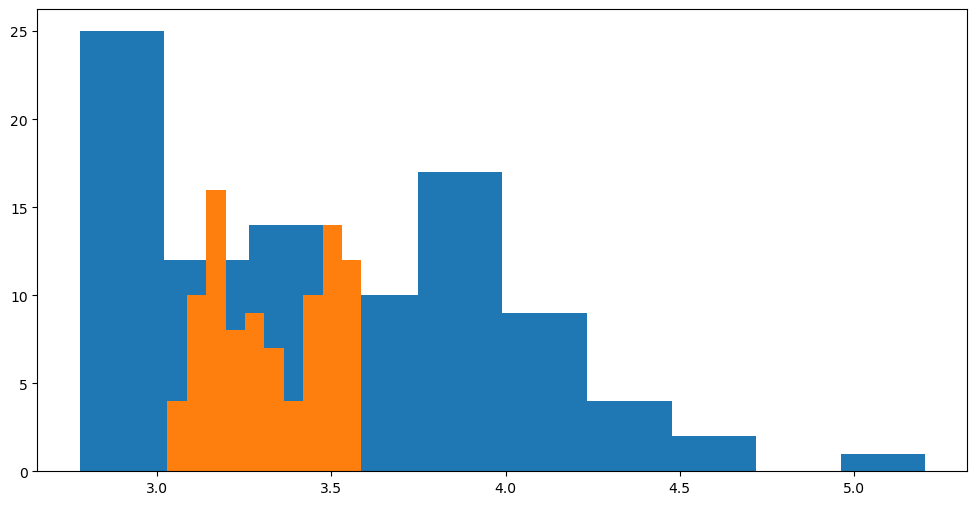

In [169]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.hist(np.log10(prices[660:]))
plt.hist(np.log10(10**preds+585))

(array([30.,  4.,  6.,  4.,  4.,  3.,  6.,  7., 13., 17.]),
 array([3.0826519, 3.1719253, 3.261199 , 3.3504725, 3.439746 , 3.5290194,
        3.618293 , 3.7075665, 3.79684  , 3.8861136, 3.975387 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

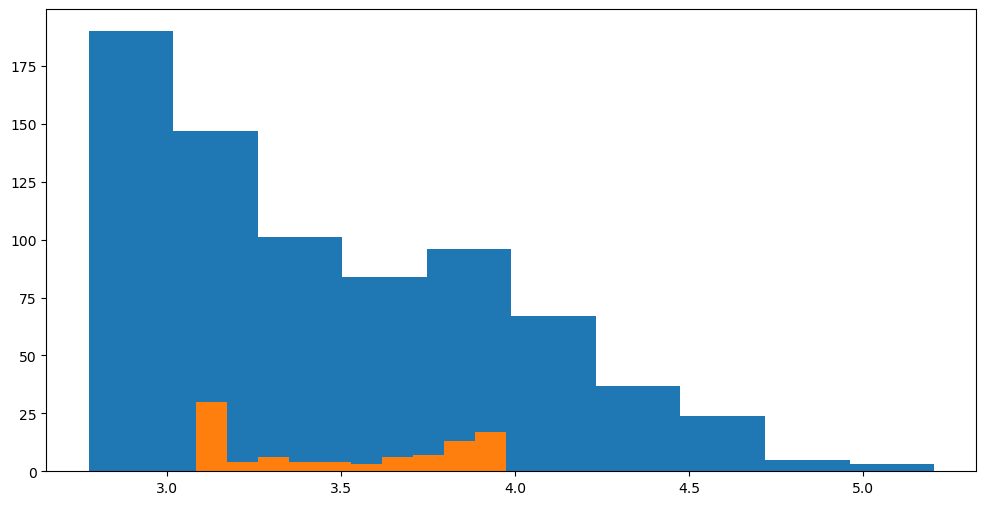

In [100]:
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(12,6))
plt.hist(np.log10(prices))
plt.hist(np.log10(preds))

In [118]:
def predict(x):
    try:
        prep_x = np.expand_dims(x[:256,:256,:3], 0)
        return {'price':model.predict(prep_x)[0][0]}
    except Exception as err:
        print(err)
        return {'price':2500}
    
predict(img_to_array(img))

1/1 [==============================] - 0s 60ms/step


{'price': 1823.7552}

In [177]:
tr = train_images[10]
tr.shape

(256, 256, 3)

In [186]:
def preprocess(x):
    try:
        prep_x = np.expand_dims(x[:256,:256,:3], 0)
        return prep_x
    except Exception as err:
        return tr
    
def postprocess(x):
    try:
        return {'price':10**x[0][0]+585}
    except:
        try:
            return {'price':10**x[0]+585}
        except:
            try:
                return {'price':10**x+585}
            except:
                return {'price':2500}

from mlem.api import save
img = img_to_array(Image.open("/kaggle/input/art-price-dataset/artDataset/image_1.png"))
save(
    model, 
    "/kaggle/working/models/nasnetmobile_2_layers_exc_2", 
    preprocess = preprocess,
    postprocess = postprocess,
    sample_data=img,
);

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......average_pooling2d
.........vars
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............activation_10
...............vars
............activation_100
...............vars
............activation_101
...............vars
............activation_102
...............vars
............activation_103
...............vars
............activation_104
...............vars
............activation_105
...............vars
............activation_106
...............vars
............activation_107
...............vars
............activation_108
...............vars
............activation_109
...............vars
............activation_11

In [187]:
!ls /kaggle/working/models/nasnetmobile_2_layers_exc_2

model  postprocess  preprocess
